In [58]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, precision_recall_curve, log_loss, matthews_corrcoef,
    cohen_kappa_score, balanced_accuracy_score
)
import matplotlib.pyplot as plt
import numpy as np

In [59]:
# Load the diabetes dataset (converted to classification)
# We'll use the original regression target and binarize it
diabetes = load_diabetes()
X = diabetes.data
y = (diabetes.target > 140).astype(int)  # Binary classification: High risk if target > 140


In [60]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [61]:
diabetes.data.shape

(442, 10)

In [62]:
diabetes.target.shape

(442,)

In [63]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]], shape=(442, 10))

In [64]:
y

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,

In [65]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("X_train.shape : ",X_train.shape)
print("y_train.shape : ",y_train.shape)
print("X_test.shape : ",X_test.shape)
print("y_test.shape : ",y_test.shape)

X_train.shape :  (309, 10)
y_train.shape :  (309,)
X_test.shape :  (133, 10)
y_test.shape :  (133,)


X_train[:2] would return a 2D array with shape (2, 10), containing the first two rows of the original X_train array.

In [66]:
print("X_train : ",X_train[:2]) #return all rows until the end row index i.e. 2 rows

X_train :  [[ 0.03081083  0.05068012  0.03259528  0.04941519 -0.04009564 -0.04358892
  -0.06917231  0.03430886  0.06301517  0.00306441]
 [ 0.07440129 -0.04464164  0.08540807  0.0631866   0.01494247  0.01309095
   0.01550536 -0.00259226  0.00620674  0.08590655]]


In [67]:
print("y_train : ",y_train[:2]) #return all rows until the end row index i.e. 2 rows

y_train :  [1 1]


This code standardizes the features in the X_train dataset using the StandardScaler from Scikit-learn.

What it does
1. StandardScaler() creates a scaler object that standardizes features by removing the mean and scaling to unit variance.
2. scaler.fit_transform(X_train):
    - fit(): Calculates the mean and standard deviation of each feature in X_train.
    - transform(): Applies the standardization to X_train using the calculated mean and standard deviation.

Result
The X_train dataset is transformed to have:

- Zero mean (μ = 0)
- Unit variance (σ = 1)

This standardization helps improve the performance and stability of many machine learning algorithms.

This code applies the same standardization to the X_test dataset using the scaler object that was previously fitted to X_train.

What it does
1. scaler.transform(X_test) uses the mean and standard deviation calculated from X_train to standardize X_test.
2. This ensures that both X_train and X_test are standardized using the same parameters.

Importance
By using the same scaler for both X_train and X_test, you:

- Prevent information leakage from the test set to the model
- Ensure that the model is evaluated on data that has been standardized in the same way as the training data

Note
You don't use fit_transform() on X_test because you want to use the same standardization parameters (mean and standard deviation) that were calculated from X_train. If you used fit_transform() on X_test, it would calculate new parameters, which could lead to inconsistent standardization.

In [68]:
# Standardize features
scaler = StandardScaler()
X_train_stndrdzed = scaler.fit_transform(X_train)
X_test_stndrdzed = scaler.transform(X_test)
print("Standardized X_train : ",X_train_stndrdzed[:2]) #return all rows until the end row index i.e. 2 rows
print("Standardized X_test : ",X_test_stndrdzed[:2]) #return all rows until the end row index i.e. 2 rows

Standardized X_train :  [[ 6.42054387e-01  1.05661647e+00  6.19059528e-01  1.00486384e+00
  -8.68438531e-01 -9.32812513e-01 -1.44851520e+00  6.76301514e-01
   1.27560982e+00 -2.79646760e-04]
 [ 1.58492079e+00 -9.46417203e-01  1.71984406e+00  1.29221024e+00
   2.79081273e-01  2.51377585e-01  3.39206868e-01 -8.48887236e-02
   8.94884476e-02  1.72793733e+00]]
Standardized X_test :  [[ 0.95634319 -0.9464172  -0.18968013 -0.36003155  2.57412088  2.59358783
   0.41693391  0.67630151  0.63706085 -0.17310134]
 [ 1.97778179 -0.9464172   0.70891949  0.43017104 -0.55287059 -0.37015865
   0.02829868 -0.84607896 -0.5102337  -0.51874474]]


In [69]:
# Train a logistic regression model
lgc_reg_model = LogisticRegression()
lgc_reg_model.fit(X_train_stndrdzed, y_train)
lgc_reg_model

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [70]:
# Predict classes - actual binary class predictions i.e. 0 or 1
y_train_pred = lgc_reg_model.predict(X_train_stndrdzed) # predictions on train data
y_test_pred = lgc_reg_model.predict(X_test_stndrdzed) # predictions on test data

In [71]:
y_train_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,

In [72]:
y_test.shape

(133,)

In [73]:
y_test_pred.shape

(133,)

In [74]:
test_probabilities = lgc_reg_model.predict_proba(X_test_stndrdzed)
print("test_probabilities.shape : ",test_probabilities.shape)
print("test_probabilities array samples : ",test_probabilities[:2])
print("test_probabilities array 1st row sample - Class 0 No Diabetes : ",test_probabilities[0,0])
print("test_probabilities array 1st row sample - Class 1  Diabetes   : ",test_probabilities[0,1])

test_probabilities.shape :  (133, 2)
test_probabilities array samples :  [[0.58693258 0.41306742]
 [0.18613439 0.81386561]]
test_probabilities array 1st row sample - Class 0 No Diabetes :  0.5869325847859207
test_probabilities array 1st row sample - Class 1  Diabetes   :  0.4130674152140793


In [75]:
# Predict Probabilities for each binary class prediction. 
# Returns the probability of the sample for each class in the model, where classes are ordered i.e with Diabetes of Class 1.
y_train_prob = lgc_reg_model.predict_proba(X_train_stndrdzed)[:, 1] # all column 1 values i.e. Diabetes 1 Class
print(y_train_prob.shape)
y_test_prob = lgc_reg_model.predict_proba(X_test_stndrdzed)[:, 1] # all column 1 values i.e. Diabetes 1 Class
print(y_test_prob.shape)

(309,)
(133,)


In [76]:
y_train_prob

array([0.93172729, 0.92431167, 0.4971422 , 0.99001406, 0.44340463,
       0.06928277, 0.91244198, 0.14342162, 0.55174935, 0.7956436 ,
       0.22049792, 0.86930267, 0.85712769, 0.61725862, 0.8364362 ,
       0.27322782, 0.40466662, 0.59357353, 0.9555482 , 0.34306327,
       0.74805043, 0.18199978, 0.67983854, 0.6074018 , 0.15436903,
       0.32248505, 0.36823059, 0.5456862 , 0.11756131, 0.09928739,
       0.51294646, 0.24010191, 0.60555088, 0.78026974, 0.18201173,
       0.40911378, 0.10895787, 0.47562594, 0.08682164, 0.3236142 ,
       0.8696138 , 0.9728253 , 0.89917825, 0.93876224, 0.94899742,
       0.98171915, 0.26878724, 0.29707517, 0.71141043, 0.50984101,
       0.11139541, 0.77857846, 0.38866813, 0.16845262, 0.91410746,
       0.91335642, 0.84849114, 0.35655423, 0.48695541, 0.56556515,
       0.24612689, 0.9057647 , 0.27837173, 0.9700581 , 0.49115061,
       0.72185031, 0.62981649, 0.26988898, 0.90971339, 0.82000231,
       0.62884173, 0.17650721, 0.24760058, 0.77597634, 0.10717

In [77]:
y_test_prob

array([0.41306742, 0.81386561, 0.28584733, 0.98916479, 0.24859614,
       0.12469117, 0.92165071, 0.59373587, 0.10243392, 0.15773375,
       0.16960767, 0.79339244, 0.11088357, 0.81414214, 0.15281559,
       0.34357707, 0.81704056, 0.92746369, 0.86022422, 0.84805248,
       0.8695922 , 0.16651772, 0.07991764, 0.74184175, 0.56631038,
       0.62867698, 0.7819597 , 0.78396035, 0.05364662, 0.18927287,
       0.71041325, 0.17825144, 0.27887981, 0.7249797 , 0.6683629 ,
       0.65550961, 0.27129364, 0.22288399, 0.40180084, 0.07789374,
       0.09753676, 0.18536298, 0.71056574, 0.47869713, 0.72769877,
       0.07450802, 0.12247724, 0.21673505, 0.09678687, 0.63259194,
       0.62549754, 0.11130805, 0.26231418, 0.25339325, 0.61877987,
       0.64171663, 0.16017412, 0.8577297 , 0.32646894, 0.05680679,
       0.72490243, 0.86974757, 0.34244011, 0.16511273, 0.43968519,
       0.89051593, 0.59053254, 0.65080488, 0.37420164, 0.42324505,
       0.72950572, 0.74427388, 0.94167472, 0.48251897, 0.18197

In [78]:
# Function to calculate specificity
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    print(f"tp : {tp} , tn : {tn}")
    print(f"fp : {fp} , fn : {fn}")
    return tn / (tn + fp)

# Function to print all metrics
def evaluate_metrics(y_true, y_pred, y_prob, label="Set"):
    print(f"\n--- {label} Metrics ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("Specificity:", specificity_score(y_true, y_pred))
    print("ROC AUC:", roc_auc_score(y_true, y_prob))
    print("Log Loss:", log_loss(y_true, y_prob))
    print("MCC:", matthews_corrcoef(y_true, y_pred))
    print("Cohen's Kappa:", cohen_kappa_score(y_true, y_pred))
    print("Balanced Accuracy:", balanced_accuracy_score(y_true, y_pred))

In [79]:
# Evaluate on train
evaluate_metrics(y_train, y_train_pred, y_train_prob, "Train")


--- Train Metrics ---
Accuracy: 0.7475728155339806
Precision: 0.75625
Recall: 0.75625
F1 Score: 0.75625
tp : 121 , tn : 110
fp : 39 , fn : 39
Specificity: 0.738255033557047
ROC AUC: 0.8378775167785234
Log Loss: 0.49209012229707744
MCC: 0.494505033557047
Cohen's Kappa: 0.494505033557047
Balanced Accuracy: 0.7472525167785236


In [80]:
# Evaluate on test
evaluate_metrics(y_test, y_test_pred, y_test_prob, "Test")


--- Test Metrics ---
Accuracy: 0.7744360902255639
Precision: 0.746031746031746
Recall: 0.7704918032786885
F1 Score: 0.7580645161290323
tp : 47 , tn : 56
fp : 16 , fn : 14
Specificity: 0.7777777777777778
ROC AUC: 0.8681693989071039
Log Loss: 0.4580864479055934
MCC: 0.5471495194554741
Cohen's Kappa: 0.5468998410174881
Balanced Accuracy: 0.7741347905282332


tpr.size : 38 , fpr.size : 38
tpr : [0.         0.01639344 0.19672131 0.19672131 0.26229508 0.26229508
 0.3442623  0.3442623  0.39344262 0.39344262 0.49180328 0.49180328
 0.50819672 0.50819672 0.52459016 0.52459016 0.63934426 0.63934426
 0.6557377  0.6557377  0.72131148 0.72131148 0.75409836 0.75409836
 0.78688525 0.78688525 0.90163934 0.90163934 0.91803279 0.91803279
 0.93442623 0.93442623 0.95081967 0.95081967 0.96721311 0.96721311
 1.         1.        ] , 
 fpr : [0.         0.         0.         0.01388889 0.01388889 0.02777778
 0.02777778 0.04166667 0.04166667 0.05555556 0.05555556 0.08333333
 0.08333333 0.09722222 0.09722222 0.125      0.125      0.15277778
 0.15277778 0.18055556 0.18055556 0.20833333 0.20833333 0.22222222
 0.22222222 0.23611111 0.23611111 0.30555556 0.30555556 0.31944444
 0.31944444 0.375      0.375      0.38888889 0.38888889 0.77777778
 0.77777778 1.        ]


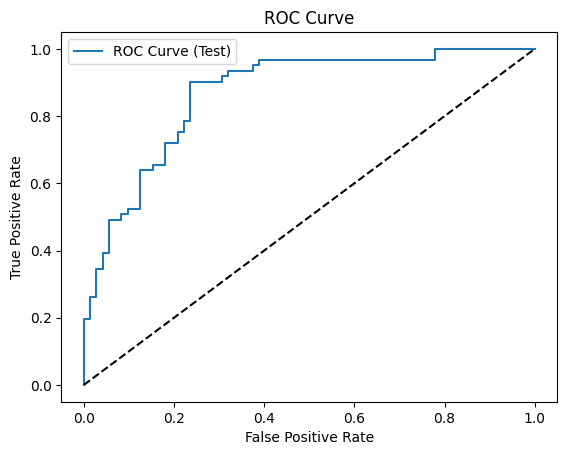

In [81]:
# Plot ROC Curve - actual ground truth y_true and the probabilities 
# of the predicted data points i.e. y_test_pred given by y_test_prob
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
print(f"tpr.size : {tpr.size} , fpr.size : {fpr.size}")
print(f"tpr : {tpr} , \n fpr : {fpr}")
plt.plot(fpr, tpr, label="ROC Curve (Test)")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

precision.size : 134 , recall.size : 134
precision : [0.45864662 0.46212121 0.46564885 0.46923077 0.47286822 0.4765625
 0.48031496 0.48412698 0.488      0.49193548 0.49593496 0.5
 0.50413223 0.50833333 0.51260504 0.51694915 0.52136752 0.51724138
 0.51304348 0.51754386 0.52212389 0.52678571 0.53153153 0.53636364
 0.5412844  0.5462963  0.55140187 0.55660377 0.56190476 0.56730769
 0.57281553 0.57843137 0.58415842 0.59       0.5959596  0.60204082
 0.60824742 0.61458333 0.62105263 0.62765957 0.6344086  0.64130435
 0.64835165 0.65555556 0.66292135 0.67045455 0.67816092 0.6744186
 0.68235294 0.67857143 0.68674699 0.69512195 0.7037037  0.7125
 0.70886076 0.71794872 0.71428571 0.72368421 0.73333333 0.74324324
 0.75342466 0.76388889 0.76056338 0.75714286 0.75362319 0.75
 0.74626866 0.74242424 0.73846154 0.75       0.74603175 0.74193548
 0.75409836 0.75       0.74576271 0.75862069 0.77192982 0.76785714
 0.76363636 0.75925926 0.75471698 0.76923077 0.78431373 0.78
 0.79591837 0.8125     0.80851064 

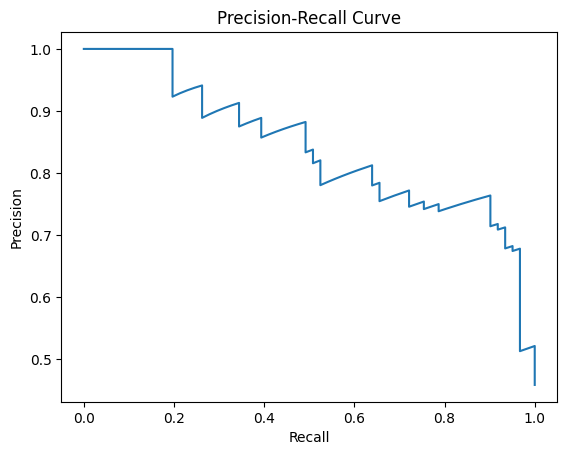

In [82]:
# Plot Precision-Recall Curve 
# actual ground truth y_true and the probabilities 
# of the predicted data points i.e. y_test_pred given by y_test_prob
precision, recall, _ = precision_recall_curve(y_test, y_test_prob)
print(f"precision.size : {precision.size} , recall.size : {recall.size}")
print(f"precision : {precision} , \n recall : {recall}")
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()
